напишіть функцію гіпотези лінійної регресії у векторному вигляді;


In [1]:
# import numpy as np

# wector_X = np.array([1, x1, x2, x3, x4, x5]) # вектор ознак
# wector_W = np.array([w0, w1, w2, w3, w4, w5]) # вектор вагів

# h_by_x = np.dot(wector_X, wector_W) # гіпотеза лінійної регресії

# print(h)

створіть функцію для обчислення функції втрат у векторному вигляді;

In [2]:
# ∇J(w)= (1/m) Xt (X w − y)
# X - матриця значень датасету

# grad_J_by_w = (1/m) * np.dot(np.transpose(X), np.dot(X, w) - y)


реалізуйте один крок градієнтного спуску;


In [3]:
# w_prew - попередній вертор параметрів
# alpha - швидкість навчання
# grad_J_by_w - градієнт функції втрат

# w = w_prew - alpha * grad_J_by_w

знайдіть найкращі параметри
w для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;


In [4]:
import numpy as np
import pandas as pd

# Функція вартості
def compute_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

# Обчислення R^2
def compute_r_squared(X, y, w):
    predictions = np.dot(X, w)
    total_variance = np.sum((y - np.mean(y)) ** 2)
    residual_variance = np.sum((y - predictions) ** 2)
    r_squared = 1 - (residual_variance / total_variance)
    return r_squared


# Підключення
file_id = '1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo'
url = f'https://drive.google.com/uc?id={file_id}'

# Дані
df = pd.read_csv(url)
df_for_x = df.drop('price', axis=1)
df_for_y = df['price']

# Перетворення даних
conwersion_legend = []
for column in df_for_x.columns:
    try:
        df_for_x[column] = df_for_x[column].astype(float)
        conwersion_legend.append({column: None})
    except ValueError:
        unique_values = df_for_x[column].unique()
        mapping = {value: index for index, value in enumerate(unique_values)}
        df_for_x[column] = df_for_x[column].map(mapping)
        conwersion_legend.append({column: mapping})


# Розділення
X = np.array(df_for_x.values.tolist(), dtype = np.float64)
y = np.array(df_for_y.values.tolist(), dtype = np.float64).reshape(-1, 1)

if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    raise ValueError("Матриця X або вектор y містить пропущені значення (NaN).")
print(f'Легенда мапування:\n{np.array(conwersion_legend)}\n')

# Нормалізація
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Стовпчик для перехоплення
X_for_scikit = X
X = np.c_[np.ones(X.shape[0]), X]


# Налаштування
m, n = X.shape
w = np.zeros((n, 1))
alpha = 0.01
iterations = 40000

# Знаходження екстремумів
for i in range(iterations):
    h_by_x = np.dot(X, w)
    grad_J_by_w = (1/m) * np.dot(np.transpose(X), np.dot(X, w) - y)
    w = w - alpha * grad_J_by_w

    # Перевірка коректності праці
    cost = compute_cost(X, y, w)
    r_squared = compute_r_squared(X, y, w)
    if i % 5000 == 0:
        print(f"Ітерація {i}\t Функція вартості: {cost}\t R^2: {r_squared}")

print(f"\nНайкращі параметри w:\n{w}")

Легенда мапування:
[{'area': None} {'bedrooms': None} {'bathrooms': None} {'stories': None}
 {'mainroad': {'yes': 0, 'no': 1}} {'guestroom': {'no': 0, 'yes': 1}}
 {'basement': {'no': 0, 'yes': 1}}
 {'hotwaterheating': {'no': 0, 'yes': 1}}
 {'airconditioning': {'yes': 0, 'no': 1}} {'parking': None}
 {'prefarea': {'yes': 0, 'no': 1}}
 {'furnishingstatus': {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}}]

Ітерація 0	 Функція вартості: 12825020868566.908	 R^2: -6.345109833007507
Ітерація 5000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 10000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 15000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 20000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 25000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 30000	 Функція вартості: 558619282739.9124	 R^2: 0.680069137617004
Ітерація 35000	 Функція вартості: 558619282739.9124	 R^2

знайдіть ці ж параметри за допомогою аналітичного рішення;


In [5]:
# wector_w_prim = (matrix_X_trans * matrix_X) ^(-1) * matrix_X_trans * wector_y

w_prim = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Аналітичні параметри w:\n", w_prim)

Аналітичні параметри w:
 [[4766729.24770642]
 [ 528826.5111213 ]
 [  88098.79093951]
 [ 496430.2497304 ]
 [ 390352.63162263]
 [-147372.20208542]
 [ 113995.86363187]
 [ 170771.5405293 ]
 [ 182623.89097796]
 [-396728.7149666 ]
 [ 240838.06147667]
 [-274295.13784822]
 [-162166.36892735]]


для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
w_bis = np.c_[model.intercept_, model.coef_].T
print("Результат w з бібліотекою scikit-learn:\n", w_bis)

Результат w з бібліотекою scikit-learn:
 [[4766729.24770642]
 [      0.        ]
 [ 528826.51112131]
 [  88098.79093952]
 [ 496430.2497304 ]
 [ 390352.63162262]
 [-147372.20208542]
 [ 113995.86363187]
 [ 170771.54052929]
 [ 182623.89097796]
 [-396728.71496661]
 [ 240838.06147667]
 [-274295.13784822]
 [-162166.36892735]]


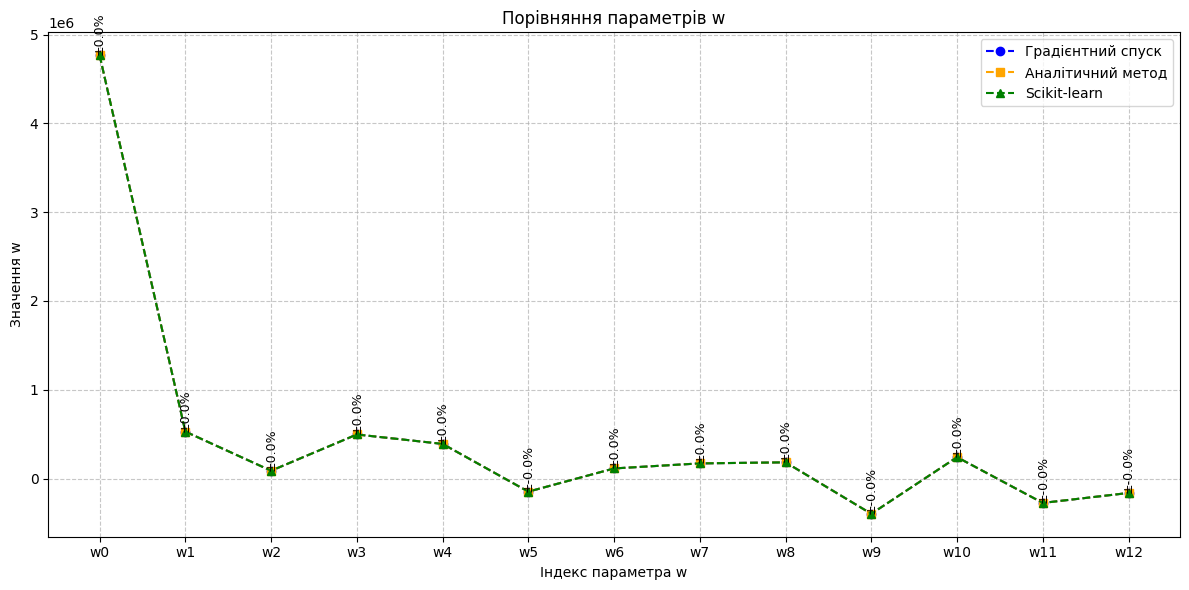

In [29]:
import matplotlib.pyplot as plt

w_manual = w.flatten()
w_analytical = w_prim.flatten()
w_sklearn = w_bis.flatten()
w_sklearn = np.delete(w_sklearn,1)

indices = np.arange(len(w_manual))
methods = np.vstack([w_manual, w_analytical, w_sklearn])

plt.figure(figsize=(12, 6))
plt.plot(indices, w_manual, label='Градієнтний спуск', color='blue', marker='o', linestyle='--')
plt.plot(indices, w_analytical, label='Аналітичний метод', color='orange', marker='s', linestyle='--')
plt.plot(indices, w_sklearn, label='Scikit-learn', color='green', marker='^', linestyle='--')

for i in range(len(w_manual)):
    max_val = np.max(methods[:, i])
    min_val = np.min(methods[:, i])
    percent_diff = ((max_val - min_val) / max_val) * 100
    plt.text(i, max_val, f"±{percent_diff:.1f}%", ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.xlabel('Індекс параметра w')
plt.ylabel('Значення w')
plt.title('Порівняння параметрів w')
plt.xticks(indices, [f'w{i}' for i in range(len(w_manual))])
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.tight_layout()
plt.show()